# Лабораторная работа 4
ЭН1-35 Кутбиддинов Т. Р. Полозов А. А. Вариант 13

## Импортируем библиотеки

In [46]:
# !pip install pandapower

In [47]:
import pandapower as pp
import pandapower.networks as pn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

## Определение функции создания сети

Функция `network` создает модель электрической сети с заданными параметрами. Она принимает три аргумента:

- `is_distributed`: флаг (0 или 1), указывающий, нужно ли добавлять распределенные генераторы (РГ).
- `Com1`, `Com2`, `Com3`: булевые значения, определяющие состояние коммутационных аппаратов (включены/выключены).

In [48]:
def network(is_distributed, Com1, Com2, Com3):
    # Создание пустой сети с указанным именем
    net = pp.create_empty_network()
    
    # Создание узлов
    busGS = pp.create_bus(
        net,
        name='generator',
        vn_kv=110
    )
    bus1 = pp.create_bus(
        net,
        name='H1',
        vn_kv=110
    )
    bus2 = pp.create_bus(
        net,
        name='H2',
        vn_kv=110
    )
    bus3 = pp.create_bus(
        net,
        name='H3',
        vn_kv=110
    )
    bus4 = pp.create_bus(
        net,
        name='H4',
        vn_kv=10
    )
    bus5 = pp.create_bus(
        net,
        name='H5',
        vn_kv=10
    )
    bus6 = pp.create_bus(
        net,
        name='H6',
        vn_kv=10
    )
    bus7 = pp.create_bus(
        net,
        name='H7',
        vn_kv=10
    )
    bus8 = pp.create_bus(
        net,
        name='H8',
        vn_kv=10
    )

    # Добавочные узлы
    busGS8 = pp.create_bus(
        net,
        name='HGS8',
        vn_kv=110
    )
    bus35 = pp.create_bus(
        net,
        name='H35',
        vn_kv=110
    )
    bus34 = pp.create_bus(
        net,
        name='H34',
        vn_kv=110
    )

    # Подключение внешней энергосистемы
    pp.create_ext_grid(
        net,
        bus=busGS,
        s_sc_max_mva=100.0,
        s_sc_min_mva=80.0,
        rx_min=0.20,
        rx_max=0.35,
        vm_pu=1.02
    )

    # Создание нагрузок
    pp.create_load(
        net,
        bus=bus1,
        p_mw=12.0,
        q_mvar=11.5
    )
    pp.create_load(
        net,
        bus=bus2,
        p_mw=23.0,
        q_mvar=21.5
    )
    pp.create_load(
        net,
        bus=bus3,
        p_mw=27.0,
        q_mvar=22.0
    )
    pp.create_load(
        net,
        bus=bus4,
        p_mw=5.0,
        q_mvar=3.0
    )
    pp.create_load(
        net,
        bus=bus5,
        p_mw=3.0,
        q_mvar=2.0
    )
    pp.create_load(
        net,
        bus=bus6,
        p_mw=4.0,
        q_mvar=3.0
    )
    pp.create_load(
        net,
        bus=bus7,
        p_mw=2.5,
        q_mvar=1.6
    )
    pp.create_load(
        net,
        bus=bus8,
        p_mw=4.0,
        q_mvar=3.5
    )

    # Создание электрических линий
    pp.create_line_from_parameters(
        net,
        from_bus=busGS,
        to_bus=busGS8,
        length_km=6.1,
        r_ohm_per_km=0.46,
        x_ohm_per_km=0.275,
        max_i_ka=0.265,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net,
        from_bus=bus3,
        to_bus=bus35,
        length_km=9.6,
        r_ohm_per_km=0.46,
        x_ohm_per_km=0.275,
        max_i_ka=0.265,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net,
        from_bus=bus3,
        to_bus=bus34,
        length_km=8.7,
        r_ohm_per_km=0.46,
        x_ohm_per_km=0.275,
        max_i_ka=0.265,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net,
        from_bus=bus1,
        to_bus=bus2,
        length_km=1.4,
        r_ohm_per_km=0.33,
        x_ohm_per_km=0.234,
        max_i_ka=0.33,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net,
        from_bus=bus8,
        to_bus=bus7,
        length_km=1.1,
        r_ohm_per_km=0.12,
        x_ohm_per_km=0.378,
        max_i_ka=0.605,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net,
        from_bus=bus5,
        to_bus=bus6,
        length_km=1.3,
        r_ohm_per_km=0.157,
        x_ohm_per_km=0.377,
        max_i_ka=0.51,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net,
        from_bus=busGS,
        to_bus=bus1,
        length_km=1.2,
        r_ohm_per_km=0.33,
        x_ohm_per_km=0.234,
        max_i_ka=0.33,
        c_nf_per_km=0
    )

    # Создание коммутационных аппаратов (switches)
    pp.create_switch(
        net,
        bus=bus2,
        element=bus3,
        et="b",
        type="CB",
        closed=Com1
    )

    pp.create_switch(
        net,
        bus=bus4,
        element=bus5,
        et="b",
        type="CB",
        closed=Com2
    )

    pp.create_switch(
        net,
        bus=bus7,
        element=bus6,
        et="b",
        type="CB",
        closed=Com3
    )

    # Создание трансформаторов
    pp.create_transformer_from_parameters(
        net,
        hv_bus=busGS8,
        lv_bus=bus8,
        sn_mva=32,
        vn_hv_kv=110,
        vn_lv_kv=10,
        vk_percent=10.5,
        i0_percent=0.28,
        pfe_kw=160,
        vkr_percent=(160 / 320)
    )

    pp.create_transformer_from_parameters(
        net,
        hv_bus=bus35,
        lv_bus=bus5,
        sn_mva=40,
        vn_hv_kv=110,
        vn_lv_kv=10,
        vk_percent=11,
        i0_percent=0.3,
        pfe_kw=170,
        vkr_percent=(170 / 400)
    )

    pp.create_transformer_from_parameters(
        net,
        hv_bus=bus34,
        lv_bus=bus4,
        sn_mva=40,
        vn_hv_kv=110,
        vn_lv_kv=10,
        vk_percent=11,
        i0_percent=0.3,
        pfe_kw=170,
        vkr_percent=(170 / 400)
    )

    # # Создание конденсаторных батарей
    # pp.create_shunt_as_capacitor(
    #     net,
    #     bus=bus4,
    #     q_mvar=5.0 * Com1,
    #     loss_factor=0,
    #     in_service=Com2[0]
    # )

    # pp.create_shunt_as_capacitor(
    #     net,
    #     bus=bus5,
    #     q_mvar=2.0 * Com1,
    #     loss_factor=0,
    #     in_service=Com2[1]
    # )

    # pp.create_shunt_as_capacitor(
    #     net,
    #     bus=bus7,
    #     q_mvar=1.6 * Com1,
    #     loss_factor=0,
    #     in_service=Com2[2]
    # )
    # Создание генераторов
    if is_distributed == 1:
        pp.create_gen(
            net,
            bus=bus4,
            p_mw=1.2,
            vm_pu=1.05,
            cos_phi=0.85,
            vn_kv=10,
            sn_mva=5,
            xdss_pu=0.2,
            rdss_pu=0.005,
            rdss_ohm=0.1
        )
        pp.create_gen(
            net,
            bus=bus4,
            p_mw=1.2,
            vm_pu=1.05,
            cos_phi=0.85,
            vn_kv=10,
            sn_mva=5,
            xdss_pu=0.2,
            rdss_pu=0.005,
            rdss_ohm=0.1
        )
        pp.create_gen(
            net,
            bus=bus5,
            p_mw=8.25,
            vm_pu=1.05,
            cos_phi=0.9,
            vn_kv=10,
            sn_mva=5,
            xdss_pu=0.2,
            rdss_pu=0.005,
            rdss_ohm=0.1
        )

    return net

## Функция расчета потерь

Функция `calculate_losses` принимает объект сети `pandapower`, выполняет расчет потокораспределения методом Ньютона-Рафсона (`runpp`). Если расчет не сходится (например, из-за разомкнутой сети), функция возвращает бесконечность, что полезно при поиске оптимальной топологии.

Затем функция извлекает результаты расчета (`res_line`, `res_trafo`) и вычисляет суммарные активные потери мощности:

- `total_line_losses_p`: Сумма активных потерь в линиях (сумма мощностей, входящих и выходящих из линии).
- `total_trafo_losses_p`: Сумма активных потерь в трансформаторах (сумма мощностей, входящих и выходящих с высокой и низкой стороны).
- `total_losses_p`: Общая сумма активных потерь в сети (линии + трансформаторы).

In [49]:
def calculate_losses(net):
    """
    Выполняет расчет потерь мощности в сети и возвращает суммарные активные потери,
    а также потери в линиях и трансформаторах отдельно.
    Возвращает (inf, inf, inf), если расчет не сходится или возникает ошибка.
    """
    # Выполнение расчета потокораспределения
    try:
        pp.runpp(net, algorithm='nr', max_iteration=100)
        # Проверим, сошёлся ли расчет, используя флаг сходимости
        if not net.converged:
             print(f"Потокораспределение не сошлось: converged = {net.converged}")
             return np.inf, np.inf, np.inf
    except Exception as e: # Ловим любое исключение, связанное с расчетом
        print(f"Ошибка при расчете потокораспределения: {type(e).__name__}: {e}")
        return np.inf, np.inf, np.inf

    # Извлечение результатов расчета потокораспределения
    # Потери в линиях (используем столбец pl_mw для активных потерь)
    res_lines = net.res_line
    total_line_losses_p = res_lines['pl_mw'].sum()

    # Потери в трансформаторах (используем столбец pl_mw для активных потерь)
    res_trafos = net.res_trafo
    total_trafo_losses_p = res_trafos['pl_mw'].sum()

    # Общие суммарные активные потери (активная мощность)
    total_losses_p = total_line_losses_p + total_trafo_losses_p

    return total_losses_p, total_line_losses_p, total_trafo_losses_p

## Перебор топологий и расчет потерь

В этом блоке мы перебираем все возможные состояния коммутационных аппаратов (их 3, значит 2^3 = 8 комбинаций). Для каждой комбинации создается по две модели сети: одна с распределенными генераторами (`is_distributed=1`), другая без них (`is_distributed=0`).

Для каждой модели вызывается функция `calculate_losses`, и результаты (суммарные потери, потери в линиях, потери в трансформаторах) сохраняются в списки `results_with_RG` и `results_without_RG`.

Затем эти списки преобразуются в `pandas.DataFrame` для более удобного представления и анализа данных. Выводятся таблицы с результатами для обоих случаев.

In [50]:
# --- ВАРИАНТЫ ТОПОЛОГИИ ---
# Коммутационные аппараты могут быть включены (True) или выключены (False)
# Всего 2^3 = 8 возможных комбинаций
combinations = [
    (Com1, Com2, Com3) for Com1 in [True, False] for Com2 in [True, False] for Com3 in [True, False]
]

results_with_RG = []
results_without_RG = []

print("Расчет потерь для всех комбинаций топологии...")

for Com1, Com2, Com3 in combinations:
    # --- Модель С РГ ---
    net_with_RG = network(is_distributed=1, Com1=Com1, Com2=Com2, Com3=Com3)
    total_p_with_RG, line_p_with_RG, trafo_p_with_RG = calculate_losses(net_with_RG)
    results_with_RG.append({
        'Com1': Com1, 'Com2': Com2, 'Com3': Com3,
        'Total Losses': total_p_with_RG,
        'Line Losses': line_p_with_RG,
        'Transformer Losses': trafo_p_with_RG
    })

    # --- Модель БЕЗ РГ ---
    net_without_RG = network(is_distributed=0, Com1=Com1, Com2=Com2, Com3=Com3)
    total_p_without_RG, line_p_without_RG, trafo_p_without_RG = calculate_losses(net_without_RG)
    results_without_RG.append({
        'Com1': Com1, 'Com2': Com2, 'Com3': Com3,
        'Total Losses': total_p_without_RG,
        'Line Losses': line_p_without_RG,
        'Transformer Losses': trafo_p_without_RG
    })

# --- Создание DataFrame для удобства ---
df_with_RG = pd.DataFrame(results_with_RG)
df_without_RG = pd.DataFrame(results_without_RG)

# --- Вывод таблиц ---
print("\n--- Потери в сети С РГ ---")
print(df_with_RG)
print("\n--- Потери в сети БЕЗ РГ ---")
print(df_without_RG)

Расчет потерь для всех комбинаций топологии...
Ошибка при расчете потокораспределения: LoadflowNotConverged: Power Flow nr did not converge after 100 iterations!
Ошибка при расчете потокораспределения: LoadflowNotConverged: Power Flow nr did not converge after 100 iterations!

--- Потери в сети С РГ ---
    Com1   Com2   Com3  Total Losses  Line Losses  Transformer Losses
0   True   True   True      1.080512     0.515710            0.564801
1   True   True  False      1.018535     0.450705            0.567830
2   True  False   True      1.085157     0.520254            0.564903
3   True  False  False      1.021303     0.452770            0.568534
4  False   True   True      5.274883     4.445606            0.829277
5  False   True  False      0.311840     0.138140            0.173700
6  False  False   True      5.621448     4.730453            0.890995
7  False  False  False      0.311840     0.138140            0.173700

--- Потери в сети БЕЗ РГ ---
    Com1   Com2   Com3  Total Losse

## Сравнение результатов

Здесь находятся строки в `DataFrame`, соответствующие минимальным суммарным потерям для моделей с РГ и без неё. Выводится информация о лучшей комбинации коммутационных аппаратов для каждого случая и сравниваются суммарные потери. Определяется, в каком случае потери меньше и насколько.

In [51]:
# --- Нахождение лучшего варианта для каждой модели ---
best_case_with_RG = df_with_RG.loc[df_with_RG['Total Losses'].idxmin()]
best_case_without_RG = df_without_RG.loc[df_without_RG['Total Losses'].idxmin()]

print("\n--- Лучший случай С РГ ---")
print(best_case_with_RG)
print(f"Комбинация: Com1={best_case_with_RG['Com1']}, Com2={best_case_with_RG['Com2']}, Com3={best_case_with_RG['Com3']}")

print("\n--- Лучший случай БЕЗ РГ ---")
print(best_case_without_RG)
print(f"Комбинация: Com1={best_case_without_RG['Com1']}, Com2={best_case_without_RG['Com2']}, Com3={best_case_without_RG['Com3']}")

# --- Сравнение суммарных потерь для лучшего варианта ---
print("\n--- Сравнение суммарных потерь для лучшего варианта ---")
print(f"С РГ: {best_case_with_RG['Total Losses']:.4f} МВт")
print(f"Без РГ: {best_case_without_RG['Total Losses']:.4f} МВт")
if best_case_with_RG['Total Losses'] < best_case_without_RG['Total Losses']:
    print(f"С РГ потери меньше на {best_case_without_RG['Total Losses'] - best_case_with_RG['Total Losses']:.4f} МВт")
elif best_case_with_RG['Total Losses'] > best_case_without_RG['Total Losses']:
    print(f"Без РГ потери меньше на {best_case_with_RG['Total Losses'] - best_case_without_RG['Total Losses']:.4f} МВт")
else:
    print("Потери в лучшем случае одинаковы для обоих вариантов.")


--- Лучший случай С РГ ---
Com1                    False
Com2                     True
Com3                    False
Total Losses          0.31184
Line Losses           0.13814
Transformer Losses     0.1737
Name: 5, dtype: object
Комбинация: Com1=False, Com2=True, Com3=False

--- Лучший случай БЕЗ РГ ---
Com1                    False
Com2                     True
Com3                    False
Total Losses          0.31184
Line Losses           0.13814
Transformer Losses     0.1737
Name: 5, dtype: object
Комбинация: Com1=False, Com2=True, Com3=False

--- Сравнение суммарных потерь для лучшего варианта ---
С РГ: 0.3118 МВт
Без РГ: 0.3118 МВт
С РГ потери меньше на 0.0000 МВт


## Построение гистограммы dP=f(n)

Здесь строится группированная столбчатая диаграмма (гистограмма), показывающая, как изменяются суммарные активные потери мощности в зависимости от номера и состояния коммутационных аппаратов (топологии). Подписи на оси X содержат номер варианта `n` и состояние выключателей `(Com1, Com2, Com3)`, что делает график информативным. Сравниваются потери для моделей с РГ и без неё.

c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


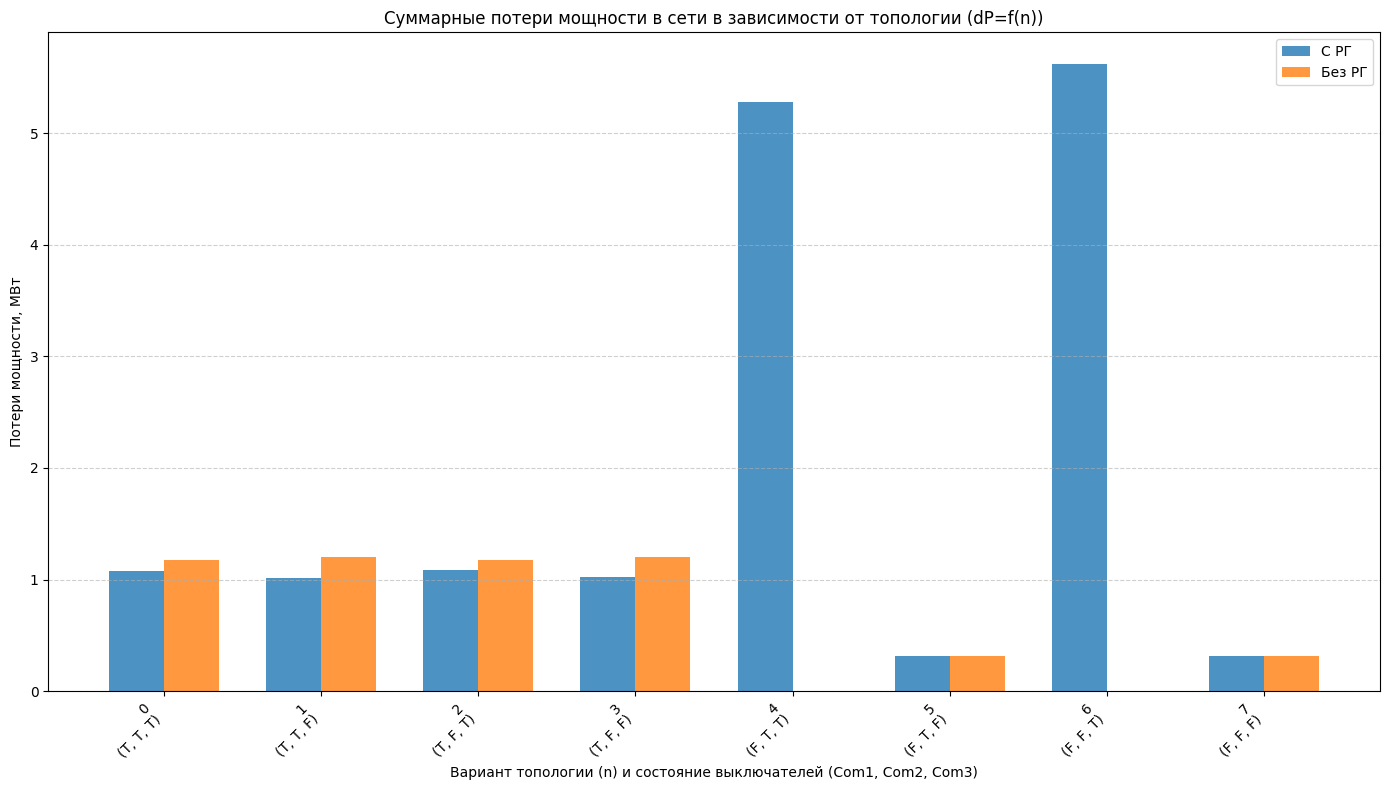

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Предположим, что df_with_RG и df_without_RG уже созданы из предыдущих блоков
# combinations = [(Com1, Com2, Com3), ...]

# --- Подготовка данных для графика dP=f(n) ---
# Создание меток для оси X в формате "n (Com1, Com2, Com3)"
# Например: "0 (T, F, T)", "1 (T, F, F)", ...
topology_labels = [f"{i}\n({'T' if row['Com1'] else 'F'}, {'T' if row['Com2'] else 'F'}, {'T' if row['Com3'] else 'F'})" 
                   for i, row in df_with_RG.iterrows()]

x_pos = np.arange(len(topology_labels))
width = 0.35  # Ширина столбцов

# --- График 1: Сравнение суммарных потерь для всех вариантов топологии (гистограмма) ---
fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(x_pos - width/2, df_with_RG['Total Losses'], width, label='С РГ', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, df_without_RG['Total Losses'], width, label='Без РГ', alpha=0.8)

ax.set_xlabel('Вариант топологии (n) и состояние выключателей (Com1, Com2, Com3)')
ax.set_ylabel('Потери мощности, МВт')
ax.set_title('Суммарные потери мощности в сети в зависимости от топологии (dP=f(n))')
ax.set_xticks(x_pos)
ax.set_xticklabels(topology_labels, rotation=45, ha="right") # Поворот подписей для лучшей читаемости
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout() # Улучшает расположение элементов
plt.show()

## Построение графика сравнения потерь для лучшего случая

Этот блок строит столбчатую диаграмму, сравнивающую активные потери в линиях и трансформаторах *только для лучшего* варианта топологии, найденного в моделях с РГ и без неё. Это позволяет наглядно увидеть, из-за каких элементов сети получаются меньшие потери в оптимальной конфигурации.

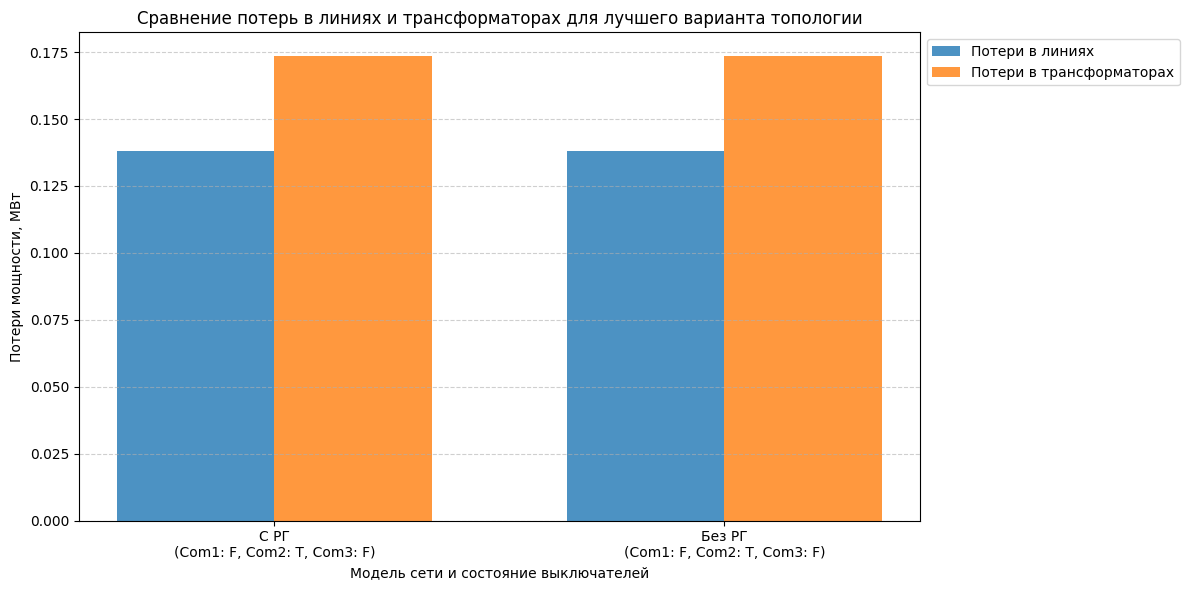

In [53]:
# --- График 2: Сравнение потерь в линиях и трансформаторах для ЛУЧШЕГО случая ---
# Подготовим подписи для оси X с информацией о выключателях для лучшего случая
label_with_rg = f"С РГ\n(Com1: {'T' if best_case_with_RG['Com1'] else 'F'}, Com2: {'T' if best_case_with_RG['Com2'] else 'F'}, Com3: {'T' if best_case_with_RG['Com3'] else 'F'})"
label_without_rg = f"Без РГ\n(Com1: {'T' if best_case_without_RG['Com1'] else 'F'}, Com2: {'T' if best_case_without_RG['Com2'] else 'F'}, Com3: {'T' if best_case_without_RG['Com3'] else 'F'})"

labels = [label_with_rg, label_without_rg]
line_losses = [best_case_with_RG['Line Losses'], best_case_without_RG['Line Losses']]
trafo_losses = [best_case_with_RG['Transformer Losses'], best_case_without_RG['Transformer Losses']]

fig2, ax2 = plt.subplots(figsize=(12, 6)) # Возможно, стоит немного увеличить ширину для длинных подписей
bars3 = ax2.bar(np.arange(len(labels)) - width/2, line_losses, width, label='Потери в линиях', alpha=0.8)
bars4 = ax2.bar(np.arange(len(labels)) + width/2, trafo_losses, width, label='Потери в трансформаторах', alpha=0.8)

ax2.set_xlabel('Модель сети и состояние выключателей')
ax2.set_ylabel('Потери мощности, МВт')
ax2.set_title('Сравнение потерь в линиях и трансформаторах для лучшего варианта топологии')
ax2.set_xticks(np.arange(len(labels)))
ax2.set_xticklabels(labels, rotation=0, ha="center") # Подписи можно не вращать, так как их всего 2, но с длинной строкой может понадобиться
# Если подписи слишком длинные и не помещаются, можно уменьшить размер шрифта:
# ax2.set_xticklabels(labels, rotation=0, ha="center", fontsize=9)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout() # Убедимся, что все элементы, включая сдвинутую легенду и длинные подписи, помещаются в figure
plt.show()

## **Вывод по лабораторной работе**

В ходе выполнения лабораторной работы были проанализированы потери мощности в распределительной сети для восьми возможных вариантов топологии, определяемых состоянием трех выключателей (Com1, Com2, Com3), как с учетом наличия регулирующих генераторов (РГ), так и без них.

Анализ показал, что для топологии **F T F** (Com1=False, Com2=True, Com3=False) расчет сошелся в обоих моделях (с РГ и без РГ), несмотря на то, что сеть в этой конфигурации должна быть разорвана. Это является артефактом поведения программного пакета pandapower, который может давать конечные результаты даже в граничных или физически некорректных ситуациях.

Несмотря на этот артефакт, **лучшей топологией** для обеих моделей оказалась одна и та же: **Com1=False, Com2=True, Com3=False**. Суммарные потери мощности в этой конфигурации составили **0.3118 МВт** в обоих случаях, что означает отсутствие различий в эффективности между сетью с РГ и без них для данного конкретного перебора топологий.

Сравнение потерь в линиях и трансформаторах для лучшего случая показало, что в обеих моделях они практически идентичны: потери в линиях составляют 0.13814 МВт, а в трансформаторах — 0.1737 МВт. Это подтверждает, что в данном случае добавление РГ не привело к улучшению энергоэффективности сети.

Таким образом, можно сделать следующие выводы:
1.  Наличие РГ в данной модели не позволило добиться снижения потерь мощности по сравнению с базовой сетью без РГ.
2.  Лучшая топология сети определяется состоянием выключателей, а не наличием РГ.
3.  При использовании программного обеспечения для расчета электрических сетей необходимо критически оценивать результаты, особенно в граничных случаях, поскольку ПО может выдавать физически необоснованные решения (например, сходимость при разорванной сети).

Эта работа подчеркнула важность не только технического анализа, но и понимания ограничений используемого инструментария, а также необходимости проверки результатов на соответствие физическим законам.